In [1]:
import os
from stages.load_video import VideoLoader
from stages.source_separation import SourceSeparation
from stages.filter_freqs import FreqFilter
from pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = r'videos'
video_paths = [os.path.join(data_path, video) for video in os.listdir(data_path)]

In [3]:
""" Define pipeline stages"""
video_loader = VideoLoader(concat_output=True)
source_separation = SourceSeparation(n_components=20, visualize=True)
freq_filter = FreqFilter(fps=50, visualize=True)

Loading video:  videos\13112020_ofUSi_ball_151856_FUS1_CAM2.mp4
Received inp: (1087, 484, 644)
(1087, 311696)


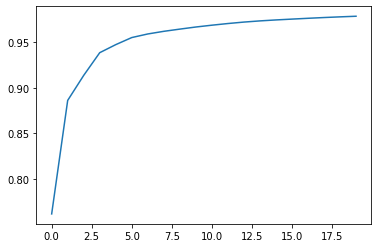

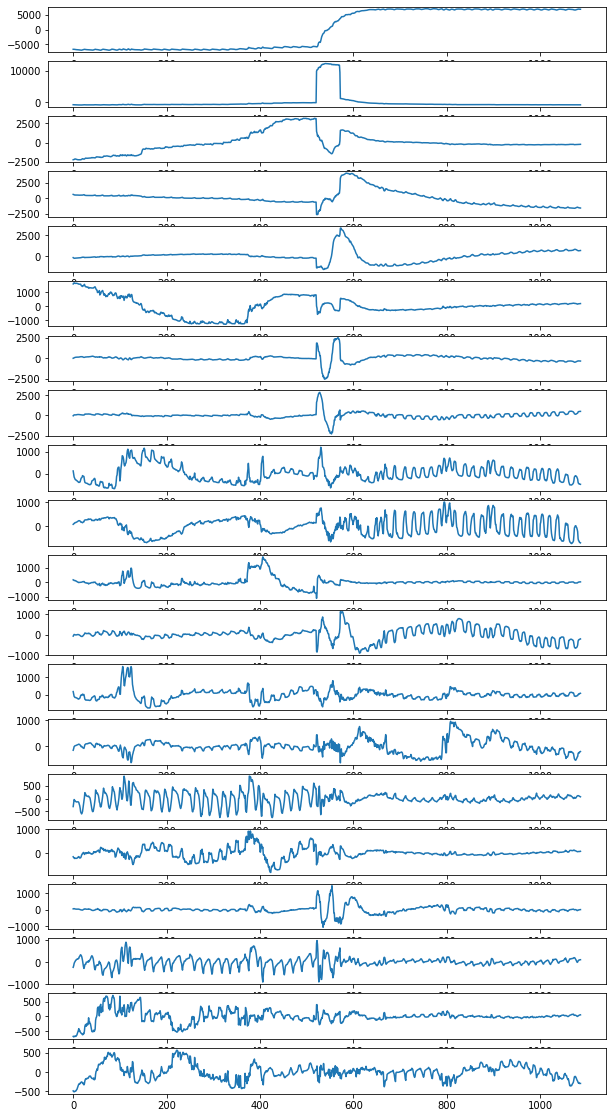

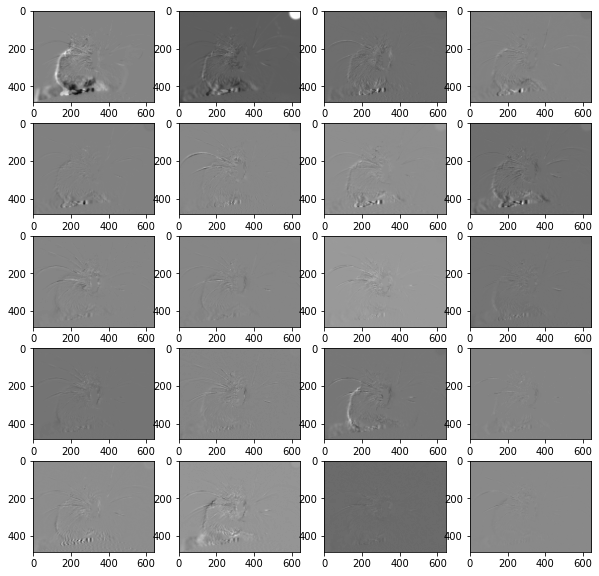

Received inp: (1087, 20)


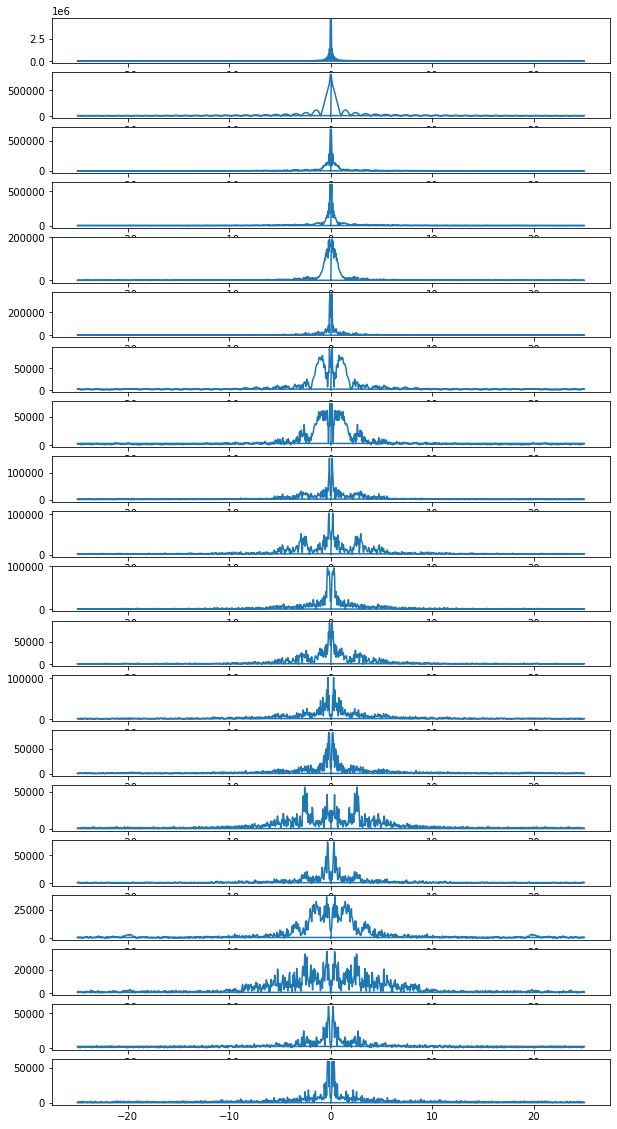

[['videos\\13112020_ofUSi_ball_151856_FUS1_CAM2.mp4'],
 array([[[12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         ...,
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 17., ..., 11., 11., 11.]],
 
        [[12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         ...,
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 17., ..., 11., 11., 11.]],
 
        [[12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         [12., 12., 12., ..., 23., 22., 22.],
         ...,
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 16., ..., 11., 11., 11.],
         [16., 16., 17., ..., 11., 11., 11.]],
 
        ...,
 
        [[16., 16., 16., ..., 24., 24., 24.],
     

In [4]:
""" Define and execute pipeline """
line = Pipeline()
line.add_stage(video_loader)
line.add_stage(source_separation)
line.add_stage(freq_filter)

line.execute(video_paths)

In [13]:
pca = source_separation.pca
n_components = 20

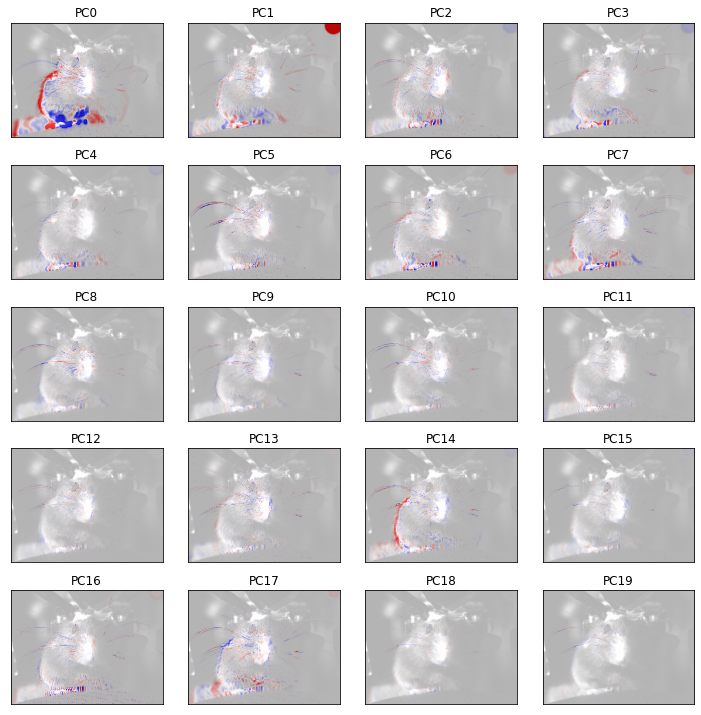

In [25]:
fig, axs = plt.subplots(int(np.ceil(source_separation.n_components/4)), 4, figsize=(10, 10))
for comp_i in range(n_components):
    comp_img = np.reshape(pca.components_[comp_i], (source_separation.height, source_separation.width))
    mean_img = np.reshape(pca.mean_, (source_separation.height, source_separation.width))
    bound = abs(max(comp_img.min(), comp_img.max(), key=abs))
    axs[comp_i//4, comp_i%4].imshow(comp_img, cmap='bwr', vmin=-1*bound/2, vmax=bound/2, alpha=1)
    axs[comp_i//4, comp_i%4].imshow(mean_img, cmap='gray', alpha=0.3)
    axs[comp_i//4, comp_i%4].set_title(f"PC{comp_i}")
    axs[comp_i//4, comp_i%4].set(xticks=[], yticks=[])
plt.tight_layout()
plt.show()


In [4]:
from scipy import signal


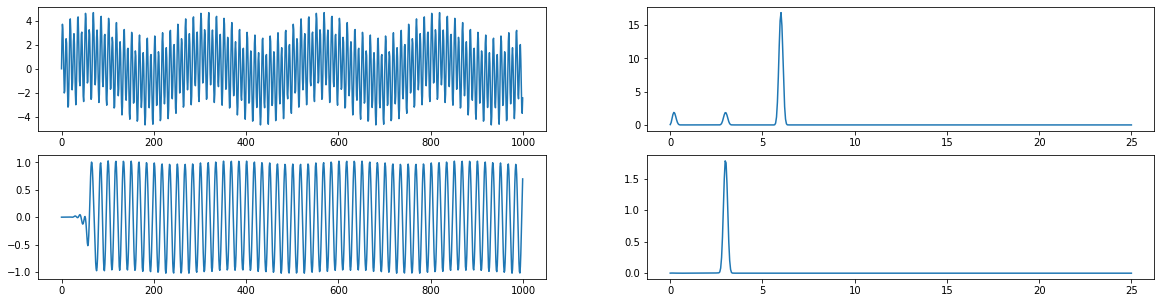

In [41]:
t = 20
f1, f2, f3 = 0.2, 6, 3
fps = 50
cutoffs = [1, 4.5]


fig, axs = plt.subplots(2, 2, figsize=(20, 5))

samples = np.arange(t * fps) / fps
s1 = 1*np.sin(2 * np.pi * f1 * samples)
s2 = 3*np.sin(2 * np.pi * f2 * samples)
s3 = 1*np.sin(2 * np.pi * f3 * samples)
total_signal = s1+s2+s3



# Show magnitude spectrum of signal
f, psd = signal.welch(x=total_signal, fs=fps, window='hamming', nperseg=256, nfft=1024, scaling='density',
                      average='mean')

# Bandpass filtering
fil = signal.firwin(numtaps=128, fs=fps, cutoff=cutoffs, window='blackmanharris', pass_zero='bandpass')
filtered_signal = signal.lfilter(fil, 1.0, total_signal)


# Show magnitude spectrum of filtered signal
filt_f, filt_psd = signal.welch(x=filtered_signal, fs=fps, window='hamming', nperseg=256, nfft=1024, scaling='density',
                      average='mean')


axs[0, 0].plot(total_signal)
axs[1, 0].plot(filtered_signal)
axs[0, 1].plot(f, psd)
axs[1, 1].plot(filt_f, filt_psd)
plt.show()